<a href="https://colab.research.google.com/github/Patternic10/CSCI-4170-Project-in-AI-ML/blob/main/Homework5_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

def scaled_dot_product_attention(Q, K, V, mask=None):
    """
    Compute the scaled dot-product attention.

    Parameters:
    Q (numpy.ndarray): Query matrix of shape (batch_size, seq_len, d_k)
    K (numpy.ndarray): Key matrix of shape (batch_size, seq_len, d_k)
    V (numpy.ndarray): Value matrix of shape (batch_size, seq_len, d_v)
    mask (numpy.ndarray, optional): Masking tensor of shape (batch_size, seq_len, seq_len)

    Returns:
    numpy.ndarray: Output matrix after attention mechanism
    """
    d_k = Q.shape[-1]  # Dimension of key vectors

    # Compute attention scores
    scores = np.matmul(Q, K.transpose(0, 2, 1)) / np.sqrt(d_k)  # (batch_size, seq_len, seq_len)

    # Apply mask (if any)
    if mask is not None:
        scores = np.where(mask == 0, -np.inf, scores)

    # Softmax to get attention weights
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)

    # Compute output
    output = np.matmul(attention_weights, V)  # (batch_size, seq_len, d_v)

    return output, attention_weights

# Example usage
batch_size = 2
seq_len = 4
d_k = 3
d_v = 3

np.random.seed(42)  # For reproducibility
Q = np.random.rand(batch_size, seq_len, d_k)
K = np.random.rand(batch_size, seq_len, d_k)
V = np.random.rand(batch_size, seq_len, d_v)

output, attn_weights = scaled_dot_product_attention(Q, K, V)

# Convert results to pandas DataFrame for readability
print("Attention Weights:")
print(pd.DataFrame(attn_weights[0]))  # Displaying only first batch

print("\nAttention Output:")
print(pd.DataFrame(output[0]))  # Displaying only first batch


Attention Weights:
          0         1         2         3
0  0.241597  0.206291  0.168301  0.383810
1  0.235459  0.232869  0.231922  0.299750
2  0.253643  0.218832  0.178914  0.348611
3  0.215477  0.202055  0.211048  0.371421

Attention Output:
          0         1         2
0  0.467834  0.410982  0.558603
1  0.506644  0.489666  0.554716
2  0.483587  0.433182  0.570991
3  0.473400  0.441020  0.529237


In [ ]:
import numpy as np
import pandas as pd

def scaled_dot_product_attention(Q, K, V):
    # Step 1: Compute the dot product of Q and K
    dot_product = np.dot(Q, K.T)

    # Step 2: Scale the dot product by the square root of the dimensionality of K
    d_k = K.shape[-1]
    scaled_dot_product = dot_product / np.sqrt(d_k)

    # Step 3: Apply the softmax function to obtain the attention weights
    attention_weights = np.exp(scaled_dot_product) / np.sum(np.exp(scaled_dot_product), axis=-1, keepdims=True)

    # Step 4: Compute the weighted sum of the values using the attention weights
    output = np.dot(attention_weights, V)

    return output, attention_weights

# Define dummy data
Q = np.array([[1, 0, 1], [0, 1, 0], [1, 1, 0]])  # Queries
K = np.array([[1, 0, 1], [1, 1, 0], [0, 1, 1]])  # Keys
V = np.array([[1, 2], [2, 3], [3, 4]])           # Values

# Compute the scaled dot-product attention
output, attention_weights = scaled_dot_product_attention(Q, K, V)

print("Output:")
print(output)
print("\nAttention Weights:")
print(attention_weights)

Output:
[[1.79337538 2.79337538]
 [2.17124184 3.17124184]
 [2.         3.        ]]

Attention Weights:
[[0.47108308 0.26445846 0.26445846]
 [0.21917211 0.39041395 0.39041395]
 [0.26445846 0.47108308 0.26445846]]


In [ ]:
#Modified Implementation

import numpy as np

class Encoder:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        # Initialize weights for the encoder
        self.W = np.random.randn(hidden_dim, input_dim) * 0.01  # Input to hidden
        self.U = np.random.randn(hidden_dim, hidden_dim) * 0.01  # Hidden to hidden
        self.b = np.zeros((hidden_dim, 1))                       # Bias

    def forward(self, X):
        """
        Forward pass for the encoder.
        X: Input sequence of shape (input_dim, seq_len)
        Returns: Hidden states of shape (hidden_dim, seq_len)
        """
        #X = X.T
        seq_len = X.shape[1]
        #print(f"Shape of X: {X.shape}")
        #print(f"Seq_len: {seq_len}")
        hidden_states = np.zeros((self.hidden_dim, seq_len))

        # Initialize the first hidden state
        h_prev = np.zeros((self.hidden_dim, 1))

        for t in range(seq_len):
            x_t = X[:, t].reshape(-1, 1)  # Current input at time step t
            # Check shapes
            #print(f"Shape of self.W: {self.W.shape}")  # Should be (hidden_dim, input_dim)
            #print(f"Shape of x_t: {x_t.shape}")        # Should be (input_dim, 1)
            #print(f"Shape of self.U: {self.U.shape}")  # Should be (hidden_dim, hidden_dim)
            #print(f"Shape of h_prev: {h_prev.shape}")  # Should be (hidden_dim, 1)
            h_t = np.tanh(np.dot(self.W, x_t) + np.dot(self.U, h_prev) + self.b)
            # Check shape of h_t
            #print(f"Shape of h_t: {h_t.shape}")  # Should be (hidden_dim, 1)
            hidden_states[:, t] = h_t.flatten()
            h_prev = h_t

        return hidden_states


class DecoderWithAttention:
    def __init__(self, hidden_dim, output_dim):
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        # Initialize weights for the decoder
        self.W = np.random.randn(hidden_dim, hidden_dim + hidden_dim) * 0.01  # For combined input
        self.U = np.random.randn(hidden_dim, hidden_dim) * 0.01               # Hidden to hidden
        self.V = np.random.randn(output_dim, hidden_dim) * 0.01                # Hidden to output
        self.b = np.zeros((hidden_dim, 1))                                     # Bias

    def scaled_dot_product_attention(self, Q, K, V):
        """
        Scaled dot-product attention.
        Q: Query (decoder hidden state) of shape (hidden_dim, 1)
        K: Keys (encoder hidden states) of shape (hidden_dim, seq_len)
        V: Values (encoder hidden states) of shape (hidden_dim, seq_len)
        """
        d_k = K.shape[0]  # Dimensionality of keys
        scores = np.dot(Q.T, K) / np.sqrt(d_k)  # Alignment scores of shape (1, seq_len)
        attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)  # Softmax
        context = np.dot(attention_weights, V.T)  # Weighted sum of values, shape (1, hidden_dim)
        return context.T, attention_weights  # Transpose context to (hidden_dim, 1)

    def forward(self, encoder_hidden_states):
        """
        Forward pass for the decoder with attention.
        encoder_hidden_states: Hidden states from the encoder (hidden_dim, seq_len)
        Returns: Outputs of shape (output_dim, seq_len)
        """
        seq_len = encoder_hidden_states.shape[1]
        outputs = np.zeros((self.output_dim, seq_len))
        h_prev = np.zeros((self.hidden_dim, 1))  # Initialize decoder hidden state

        for t in range(seq_len):
            # Compute attention context
            context, _ = self.scaled_dot_product_attention(h_prev, encoder_hidden_states, encoder_hidden_states)

            # Concatenate context with previous hidden state
            combined = np.concatenate((h_prev, context), axis=0)  # Shape (2 * hidden_dim, 1)

            # Compute new hidden state
            h_t = np.tanh(np.dot(self.W, combined) + np.dot(self.U, h_prev) + self.b)

            # Compute output (apply softmax for probabilities)
            y_t = np.dot(self.V, h_t)
            y_t = np.exp(y_t) / np.sum(np.exp(y_t), axis=0)  # Softmax
            outputs[:, t] = y_t.flatten()

            # Update previous hidden state
            h_prev = h_t

        return outputs


class Seq2SeqModel:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.encoder = Encoder(input_dim, hidden_dim)
        self.decoder = DecoderWithAttention(hidden_dim, output_dim)

    def forward(self, X):
        """
        Forward pass for the seq2seq model.
        X: Input sequence (input_dim, seq_len)
        Returns: Outputs of shape (output_dim, seq_len)
        """
        # Encode the input sequence
        encoder_hidden_states = self.encoder.forward(X)

        # Decode the target sequence with attention
        outputs = self.decoder.forward(encoder_hidden_states)

        return outputs

In [ ]:
#Modified Implementation Grok

import numpy as np

class Encoder:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        # Initialize weights for the encoder
        self.W = np.random.randn(hidden_dim, input_dim) * 0.01  # Input to hidden
        self.U = np.random.randn(hidden_dim, hidden_dim) * 0.01  # Hidden to hidden
        self.b = np.zeros((hidden_dim, 1))                       # Bias

    def forward(self, X):
        """
        Forward pass for the encoder.
        X: Input sequence of shape (input_dim, seq_len)
        Returns: Hidden states of shape (hidden_dim, seq_len)
        """
        #X = X.T
        seq_len = X.shape[1]
        #print(f"Shape of X: {X.shape}")
        #print(f"Seq_len: {seq_len}")
        hidden_states = np.zeros((self.hidden_dim, seq_len))

        # Initialize the first hidden state
        h_prev = np.zeros((self.hidden_dim, 1))

        for t in range(seq_len):
            x_t = X[:, t].reshape(-1, 1)  # Current input at time step t
            # Check shapes
            #print(f"Shape of self.W: {self.W.shape}")  # Should be (hidden_dim, input_dim)
            #print(f"Shape of x_t: {x_t.shape}")        # Should be (input_dim, 1)
            #print(f"Shape of self.U: {self.U.shape}")  # Should be (hidden_dim, hidden_dim)
            #print(f"Shape of h_prev: {h_prev.shape}")  # Should be (hidden_dim, 1)
            h_t = np.tanh(np.dot(self.W, x_t) + np.dot(self.U, h_prev) + self.b)
            # Check shape of h_t
            #print(f"Shape of h_t: {h_t.shape}")  # Should be (hidden_dim, 1)
            hidden_states[:, t] = h_t.flatten()
            h_prev = h_t

        return hidden_states


class DecoderWithAttention:
    def __init__(self, hidden_dim, output_dim):
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        # Initialize weights for the decoder
        self.W = np.random.randn(hidden_dim, hidden_dim + hidden_dim) * 0.01  # For combined input
        self.U = np.random.randn(hidden_dim, hidden_dim) * 0.01               # Hidden to hidden
        self.V = np.random.randn(output_dim, hidden_dim) * 0.01                # Hidden to output
        self.b = np.zeros((hidden_dim, 1))                                     # Bias

    def scaled_dot_product_attention(self, Q, K, V):
        """
        Scaled dot-product attention.
        Q: Query (decoder hidden state) of shape (hidden_dim, 1)
        K: Keys (encoder hidden states) of shape (hidden_dim, seq_len)
        V: Values (encoder hidden states) of shape (hidden_dim, seq_len)
        """
        d_k = K.shape[0]  # Dimensionality of keys
        scores = np.dot(Q.T, K) / np.sqrt(d_k)  # Alignment scores of shape (1, seq_len)
        attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)  # Softmax
        context = np.dot(attention_weights, V.T)  # Weighted sum of values, shape (1, hidden_dim)
        return context.T, attention_weights  # Transpose context to (hidden_dim, 1)

    def forward(self, encoder_hidden_states):
        """
        Forward pass for the decoder with attention.
        encoder_hidden_states: Hidden states from the encoder (hidden_dim, seq_len)
        Returns: Outputs of shape (output_dim, seq_len)
        """
        seq_len = encoder_hidden_states.shape[1]
        outputs = np.zeros((self.output_dim, seq_len))
        h_prev = np.zeros((self.hidden_dim, 1))  # Initialize decoder hidden state

        for t in range(seq_len):
            # Compute attention context
            context, _ = self.scaled_dot_product_attention(h_prev, encoder_hidden_states, encoder_hidden_states)

            # Concatenate context with previous hidden state
            combined = np.concatenate((h_prev, context), axis=0)  # Shape (2 * hidden_dim, 1)

            # Compute new hidden state
            h_t = np.tanh(np.dot(self.W, combined) + np.dot(self.U, h_prev) + self.b)

            # Compute output (apply softmax for probabilities)
            y_t = np.dot(self.V, h_t)
            y_t = np.exp(y_t) / np.sum(np.exp(y_t), axis=0)  # Softmax
            outputs[:, t] = y_t.flatten()

            # Update previous hidden state
            h_prev = h_t

        return outputs


class Seq2SeqModel:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.encoder = Encoder(input_dim, hidden_dim)
        self.decoder = DecoderWithAttention(hidden_dim, output_dim)

    def forward(self, X, Y=None):
        """
        Forward pass for the seq2seq model.
        X: Input sequence (input_dim, seq_len)
        Returns: Outputs of shape (output_dim, seq_len)
        """
        # Encode the input sequence
        encoder_hidden_states = self.encoder.forward(X)

        # Decode the target sequence with attention
        outputs = self.decoder.forward(encoder_hidden_states,Y)

        return outputs

In [ ]:
#New implementation
import numpy as np

class Encoder:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.W = np.random.randn(hidden_dim, input_dim) * 0.01
        self.U = np.random.randn(hidden_dim, hidden_dim) * 0.01
        self.b = np.zeros((hidden_dim, 1))

    def forward(self, X):
        seq_len = X.shape[1]
        hidden_states = np.zeros((self.hidden_dim, seq_len))
        h_prev = np.zeros((self.hidden_dim, 1))
        for t in range(seq_len):
            x_t = X[:, t].reshape(-1, 1)
            h_t = np.tanh(np.dot(self.W, x_t) + np.dot(self.U, h_prev) + self.b)
            hidden_states[:, t] = h_t.flatten()
            h_prev = h_t
        return hidden_states

class DecoderWithAttention:
    def __init__(self, hidden_dim, output_dim):
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.embedding = np.random.randn(hidden_dim, output_dim) * 0.01
        self.W = np.random.randn(hidden_dim, hidden_dim + hidden_dim) * 0.01
        self.U = np.random.randn(hidden_dim, hidden_dim) * 0.01
        self.V = np.random.randn(output_dim, hidden_dim) * 0.01
        self.b = np.zeros((hidden_dim, 1))

    def scaled_dot_product_attention(self, Q, K, V):
        d_k = K.shape[0]
        scores = np.dot(Q.T, K) / np.sqrt(d_k)
        attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=1, keepdims=True)
        context = np.dot(attention_weights, V.T).T
        return context, attention_weights

    def forward(self, encoder_hidden_states, Y=None):
        if Y is not None:  # Training with teacher forcing
            seq_len = len(Y)
            outputs = np.zeros((self.output_dim, seq_len))
            h_prev = np.zeros((self.hidden_dim, 1))
            for t in range(seq_len):
                embedded_y = np.zeros((self.hidden_dim, 1)) if t == 0 else self.embedding[:, Y[t-1]].reshape(-1, 1)
                context, _ = self.scaled_dot_product_attention(h_prev, encoder_hidden_states, encoder_hidden_states)
                combined = np.concatenate((embedded_y, context), axis=0)
                h_t = np.tanh(np.dot(self.W, combined) + np.dot(self.U, h_prev) + self.b)
                y_t = np.dot(self.V, h_t)
                y_t = np.exp(y_t) / np.sum(np.exp(y_t), axis=0)
                outputs[:, t] = y_t.flatten()
                h_prev = h_t
            return outputs
        else:  # Inference
            seq_len = encoder_hidden_states.shape[1]
            outputs = np.zeros((self.output_dim, seq_len))
            h_prev = np.zeros((self.hidden_dim, 1))
            embedded_y = np.zeros((self.hidden_dim, 1))
            for t in range(seq_len):
                context, _ = self.scaled_dot_product_attention(h_prev, encoder_hidden_states, encoder_hidden_states)
                combined = np.concatenate((embedded_y, context), axis=0)
                h_t = np.tanh(np.dot(self.W, combined) + np.dot(self.U, h_prev) + self.b)
                y_t = np.dot(self.V, h_t)
                y_t = np.exp(y_t) / np.sum(np.exp(y_t), axis=0)
                outputs[:, t] = y_t.flatten()
                y_pred = np.argmax(y_t)
                embedded_y = self.embedding[:, y_pred].reshape(-1, 1)
                h_prev = h_t
            return outputs

class Seq2SeqModel:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.encoder = Encoder(input_dim, hidden_dim)
        self.decoder = DecoderWithAttention(hidden_dim, output_dim)

    def forward(self, X, Y=None):
        encoder_hidden_states = self.encoder.forward(X)
        outputs = self.decoder.forward(encoder_hidden_states, Y)
        return outputs

In [ ]:
import numpy as np
import pandas as pd

def scaled_dot_product_attention(Q, K, V, mask=None):
    """
    Compute the scaled dot-product attention.

    Parameters:
    Q (numpy.ndarray): Query matrix of shape (batch_size, seq_len, d_k)
    K (numpy.ndarray): Key matrix of shape (batch_size, seq_len, d_k)
    V (numpy.ndarray): Value matrix of shape (batch_size, seq_len, d_v)
    mask (numpy.ndarray, optional): Masking tensor of shape (batch_size, seq_len, seq_len)

    Returns:
    numpy.ndarray: Output matrix after attention mechanism
    """
    d_k = Q.shape[-1]  # Dimension of key vectors

    # Compute attention scores
    scores = np.matmul(Q, K.transpose(0, 2, 1)) / np.sqrt(d_k)  # (batch_size, seq_len, seq_len)

    # Apply mask (if any)
    if mask is not None:
        scores = np.where(mask == 0, -np.inf, scores)

    # Softmax to get attention weights
    attention_weights = np.exp(scores) / np.sum(np.exp(scores), axis=-1, keepdims=True)

    # Compute output
    output = np.matmul(attention_weights, V)  # (batch_size, seq_len, d_v)

    return output, attention_weights

def encoder(X, W):
    """ Simple encoder that transforms input X using learned weights W """
    return np.tanh(np.dot(X, W))

def decoder(Y, W, encoder_outputs):
    """ Simple decoder with attention """
    Q = np.dot(Y, W)  # Convert decoder input into query
    context_vector, attention_weights = scaled_dot_product_attention(Q, encoder_outputs, encoder_outputs)
    return context_vector, attention_weights

# Example usage
batch_size = 2
seq_len = 4
d_k = 3
d_v = 3
hidden_dim = 3

np.random.seed(42)
X = np.random.rand(batch_size, seq_len, d_k)  # Encoder input
Y = np.random.rand(batch_size, seq_len, d_k)  # Decoder input
W_enc = np.random.rand(d_k, hidden_dim)  # Encoder weights
W_dec = np.random.rand(d_k, hidden_dim)  # Decoder weights

encoder_outputs = encoder(X, W_enc)
context_vector, attn_weights = decoder(Y, W_dec, encoder_outputs)

print("Attention Weights:")
print(pd.DataFrame(attn_weights[0]))  # Displaying only first batch

print("\nContext Vector:")
print(pd.DataFrame(context_vector[0]))  # Displaying only first batch


Attention Weights:
          0         1         2         3
0  0.287783  0.209760  0.257723  0.244734
1  0.277640  0.220422  0.255693  0.246245
2  0.264978  0.233741  0.253151  0.248131
3  0.317726  0.180831  0.262175  0.239268

Context Vector:
          0         1         2
0  0.744479  0.764446  0.721462
1  0.740357  0.758494  0.719004
2  0.735207  0.751058  0.715934
3  0.755938  0.780848  0.728558


In [ ]:
import os
import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.datasets import Multi30k
import spacy
import jinja2
# Define tokenizers for English and German
SRC_LANGUAGE = 'en'  # Source language (English)
TGT_LANGUAGE = 'de'  # Target language (German)

# Load tokenizers
tokenizer_src = get_tokenizer('spacy', language='en_core_web_sm')
tokenizer_tgt = get_tokenizer('spacy', language='de_core_news_sm')

# Load the dataset
train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
val_iter = Multi30k(split='valid', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
test_iter = Multi30k(split='test', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))

# Build vocabulary
def yield_tokens(data_iter, tokenizer, index):
    for src_tgt_pair in data_iter:
        yield tokenizer(src_tgt_pair[index])

# Build source and target vocabularies
vocab_src = build_vocab_from_iterator(yield_tokens(train_iter, tokenizer_src, 0), specials=['<unk>', '<pad>', '<sos>', '<eos>'])
vocab_tgt = build_vocab_from_iterator(yield_tokens(train_iter, tokenizer_tgt, 1), specials=['<unk>', '<pad>', '<sos>', '<eos>'])
# Set default index for unknown tokens
vocab_src.set_default_index(vocab_src['<unk>'])
vocab_tgt.set_default_index(vocab_tgt['<unk>'])
# Function to tokenize and numericalize a sentence
def preprocess_sentence(sentence, tokenizer, vocab):
    tokens = tokenizer(sentence)  # Tokenize the sentence
    numericalized_tokens = vocab(tokens)  # Convert tokens to numerical indices
    return numericalized_tokens
# Function to add special tokens
def add_special_tokens(tokens, vocab):
    sos_token = vocab['<sos>']
    eos_token = vocab['<eos>']
    return [sos_token] + tokens + [eos_token]

# Prepare the dataset
def prepare_dataset(data_iter, tokenizer_src, tokenizer_tgt, vocab_src, vocab_tgt):
    src_data = []
    tgt_data = []
    for src, tgt in data_iter:
        src_tokens = preprocess_sentence(src, tokenizer_src, vocab_src)
        tgt_tokens = preprocess_sentence(tgt, tokenizer_tgt, vocab_tgt)
        src_tokens = add_special_tokens(src_tokens, vocab_src)
        tgt_tokens = add_special_tokens(tgt_tokens, vocab_tgt)
        src_data.append(src_tokens)
        tgt_data.append(tgt_tokens)
    return src_data, tgt_data

# Example usage
example_sentence = "This is a test."
preprocessed_sentence = preprocess_sentence(example_sentence, tokenizer_src, vocab_src)
print(preprocessed_sentence)

/home/kazeej/anaconda3/envs/RNN/lib/python3.11/site-packages/torch/utils/data/datapipes/iter/combining.py:333: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


[278, 10, 4, 2961, 5]


In [ ]:
# Example usage
preprocessed_sentence_with_tokens = add_special_tokens(preprocessed_sentence, vocab_src)
print(preprocessed_sentence_with_tokens)

[2, 278, 10, 4, 2961, 5, 3]


In [ ]:
src_data, tgt_data = prepare_dataset(train_iter, tokenizer_src, tokenizer_tgt, vocab_src, vocab_tgt)

In [ ]:
# Function to pad sequences
def pad_sequence(sequence, max_len, pad_token):
    return sequence + [pad_token] * (max_len - len(sequence))

# Find the maximum sequence length
max_src_len = max(len(seq) for seq in src_data)
max_tgt_len = max(len(seq) for seq in tgt_data)

# Pad all sequences
src_data_padded = [pad_sequence(seq, max_src_len, vocab_src['<pad>']) for seq in src_data]
tgt_data_padded = [pad_sequence(seq, max_tgt_len, vocab_tgt['<pad>']) for seq in tgt_data]

# Convert to NumPy arrays
src_data_padded = np.array(src_data_padded)
tgt_data_padded = np.array(tgt_data_padded)

# Print sample output
print("Sample preprocessed source sentence:", src_data_padded[0].shape)
print("Sample preprocessed target sentence:", tgt_data_padded[0].shape)

Sample preprocessed source sentence: (43,)
Sample preprocessed target sentence: (46,)


In [ ]:
src_data_padded.shape, tgt_data_padded.shape

((29001, 43), (29001, 46))

In [ ]:
len(vocab_src), len(vocab_tgt)

(10837, 19214)

In [ ]:
from scipy.sparse import csr_matrix

# Function to one-hot encode a sequence of word indices using sparse matrices
def one_hot_encode_sparse(sequence, vocab_size):
    """
    Converts a sequence of word indices to a sparse one-hot encoded matrix.
    sequence: List of word indices (shape: (seq_len,))
    vocab_size: Size of the vocabulary (input_dim)
    Returns: Sparse one-hot encoded matrix of shape (vocab_size, seq_len)
    """
    seq_len = len(sequence)
    rows = sequence  # Row indices (word indices)
    cols = np.arange(seq_len)  # Column indices (time steps)
    data = np.ones(seq_len)  # Values (all 1s)
    return csr_matrix((data, (rows, cols)), shape=(vocab_size, seq_len))

# One-hot encode the padded source sequences using sparse matrices
input_dim = len(vocab_src)  # Size of source vocabulary
src_data_one_hot = [one_hot_encode_sparse(seq, input_dim) for seq in src_data_padded]

# Print sample output
print("Sample one-hot encoded source sentence shape:", src_data_one_hot[0].shape)

Sample one-hot encoded source sentence shape: (10837, 43)


In [ ]:
src_data_one_hot[0].shape, tgt_data_padded[0].shape

((10837, 43), (46,))

In [ ]:
def batch_generator(data, batch_size):
    """
    Yields batches of data one at a time.
    data: List or array of sequences
    batch_size: Number of samples per batch
    """
    num_samples = len(data)
    for i in range(0, num_samples, batch_size):
        yield data[i:i + batch_size]

In [ ]:
import numpy as np

# Set hyperparameters
learning_rate = 0.01
epochs = 10  # You can increase this later

# Extract model dimensions
input_dim = len(vocab_src)   # Size of input vocabulary
output_dim = len(vocab_tgt)  # Size of output vocabulary
hidden_dim = 128             # You can adjust based on performance

# Initialize Seq2Seq model
model = Seq2SeqModel(input_dim, hidden_dim, output_dim)

# Define loss function (categorical cross-entropy)
def cross_entropy_loss(y_pred, y_true):
    """
    Computes categorical cross-entropy loss.
    y_pred: (output_dim, seq_len) - Softmax probabilities
    y_true: (seq_len,) - True target indices
    """
    loss = 0
    seq_len = len(y_true)
    for t in range(seq_len):
        loss -= np.log(y_pred[y_true[t], t] + 1e-9)  # Avoid log(0) issues
    return loss / seq_len  # Average over sequence length

# Compute gradients using finite difference method
def compute_gradients(model, X, Y):
    """
    Compute gradients for the model parameters using simple finite difference method.
    X: Input sequence (padded source sentence, shape: input_dim, seq_len_src)
    Y: Target sequence (padded target sentence, shape: seq_len_tgt)
    """
    epsilon = 1e-5  # Small perturbation
    gradients = {}  # Store gradients

    # Compute initial loss with teacher forcing
    outputs = model.forward(X, Y)
    initial_loss = cross_entropy_loss(outputs, Y)

    # Encoder parameters to update
    encoder_params = ['W', 'U', 'b']
    # Decoder parameters to update, including the new embedding matrix
    decoder_params = ['embedding', 'W', 'U', 'V', 'b']

    # Compute gradients for encoder parameters
    for param_name in encoder_params:
        param = getattr(model.encoder, param_name)
        gradient_matrix = np.zeros_like(param)
        for i in range(param.shape[0]):
            for j in range(param.shape[1]):
                param[i, j] += epsilon
                perturbed_outputs = model.forward(X, Y)
                perturbed_loss = cross_entropy_loss(perturbed_outputs, Y)
                gradient_matrix[i, j] = (perturbed_loss - initial_loss) / epsilon
                param[i, j] -= epsilon
        gradients[f'encoder_{param_name}'] = gradient_matrix

    # Compute gradients for decoder parameters
    for param_name in decoder_params:
        param = getattr(model.decoder, param_name)
        gradient_matrix = np.zeros_like(param)
        for i in range(param.shape[0]):
            for j in range(param.shape[1]):
                param[i, j] += epsilon
                perturbed_outputs = model.forward(X, Y)
                perturbed_loss = cross_entropy_loss(perturbed_outputs, Y)
                gradient_matrix[i, j] = (perturbed_loss - initial_loss) / epsilon
                param[i, j] -= epsilon
        gradients[f'decoder_{param_name}'] = gradient_matrix

    return gradients

# Training loop with sparse matrices
batch_size = 16  # Number of samples per batch
num_epochs = 10  # Number of epochs

for epoch in range(num_epochs):
    total_loss = 0

    # Create batch generators for source and target data
    src_batches = batch_generator(src_data_one_hot, batch_size)
    tgt_batches = batch_generator(tgt_data_padded, batch_size)

    # Iterate through batches
    for batch_idx, (src_batch, tgt_batch) in enumerate(zip(src_batches, tgt_batches)):
        batch_loss = 0

        # Process each sample in the batch
        for i in range(len(src_batch)):
            # Get sparse one-hot encoded input and target sequence
            X_sparse = src_batch[i]  # Sparse matrix of shape (input_dim, seq_len)
            Y = tgt_batch[i]         # Shape: (seq_len,)

            # Convert sparse matrix to dense array for model.forward
            X = X_sparse.toarray()  # Shape: (input_dim, seq_len)

            # Forward pass with teacher forcing
            outputs = model.forward(X, Y)

            # Compute loss
            loss = cross_entropy_loss(outputs, Y)
            batch_loss += loss

            # Compute gradients
            gradients = compute_gradients(model, X, Y)

            # Update model parameters using simple gradient descent
            # Update encoder parameters
            for param_name in ['W', 'U', 'b']:
                param = getattr(model.encoder, param_name)
                param -= learning_rate * gradients[f'encoder_{param_name}']
            # Update decoder parameters
            for param_name in ['embedding', 'W', 'U', 'V', 'b']:
                param = getattr(model.decoder, param_name)
                param -= learning_rate * gradients[f'decoder_{param_name}']

        # Accumulate total loss (average loss per sample in the batch)
        total_loss += batch_loss / len(src_batch)

        # Print batch loss
        print(f"Epoch {epoch+1}/{num_epochs}, Batch {batch_idx+1}, Loss: {batch_loss / len(src_batch):.4f}")

    # Print average loss per epoch
    avg_loss = total_loss / (len(src_data_one_hot) // batch_size)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")

print("Training complete! 🚀")

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math

In [ ]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1)]
        return x

In [ ]:
def scaled_dot_product_attention(q, k, v, mask=None):
    d_k = q.size(-1)
    scores = torch.matmul(q, k.transpose(-2, -1)) / math.sqrt(d_k)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, float('-inf'))
    attention = F.softmax(scores, dim=-1)
    output = torch.matmul(attention, v)
    return output, attention

In [ ]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads
        self.wq = nn.Linear(d_model, d_model)
        self.wk = nn.Linear(d_model, d_model)
        self.wv = nn.Linear(d_model, d_model)
        self.wo = nn.Linear(d_model, d_model)

    def forward(self, q, k, v, mask=None):
        batch_size = q.size(0)
        seq_len = q.size(1)
        #print(f"Input shapes - q: {q.shape}, k: {k.shape}, v: {v.shape}")  # Debug statement
        q = self.wq(q).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        k = self.wk(k).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        v = self.wv(v).view(batch_size, -1, self.num_heads, self.d_k).transpose(1, 2)
        scores, attention = scaled_dot_product_attention(q, k, v, mask)
        concat = scores.transpose(1, 2).contiguous().view(batch_size, -1, self.d_model)
        output = self.wo(concat)
        return output, attention

In [ ]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model)
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x, mask=None):
        attn_output, _ = self.self_attn(x, x, x, mask)
        x = self.norm1(x + attn_output)
        ff_output = self.feed_forward(x)
        x = self.norm2(x + ff_output)
        return x

class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = nn.Sequential(
            nn.Linear(d_model, d_ff),
            nn.ReLU(),
            nn.Linear(d_ff, d_model)
        )
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)

    def forward(self, x, encoder_output, src_mask, tgt_mask):
        attn_output, _ = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + attn_output)
        attn_output, _ = self.cross_attn(x, encoder_output, encoder_output, src_mask)
        x = self.norm2(x + attn_output)
        ff_output = self.feed_forward(x)
        x = self.norm3(x + ff_output)
        return x

In [ ]:
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_len, dropout=0.1):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_len)
        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff) for _ in range(num_layers)])
        self.fc_out = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src, tgt, src_mask, tgt_mask):
        src = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))
        for layer in self.encoder_layers:
            src = layer(src, src_mask)
        for layer in self.decoder_layers:
            tgt = layer(tgt, src, src_mask, tgt_mask)
        output = self.fc_out(tgt)
        return output

In [ ]:
import os
import io
from os.path import exists
import torchtext
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
#from torchtext.datasets import Multi30k
import spacy
from itertools import chain

#Load data
all_de_train = iter(io.open('Multi30k/train.de', encoding="utf8"))
all_en_train = iter(io.open('Multi30k/train.en', encoding="utf8"))
all_de_test = iter(io.open('Multi30k/test.de', encoding="utf8"))
all_en_test = iter(io.open('Multi30k/test.en', encoding="utf8"))
all_de_val = iter(io.open('Multi30k/val.de', encoding="utf8"))
all_en_val = iter(io.open('Multi30k/val.en', encoding="utf8"))

In [ ]:
all_de_train = list(all_de_train)
all_en_train = list(all_en_train)
all_de_test = list(all_de_test)
all_en_test = list(all_en_test)
all_de_val = list(all_de_val)
all_en_val = list(all_en_val)

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

# Define tokenizers for English and German
tokenizer_src = get_tokenizer('spacy', language='en_core_web_sm')
tokenizer_tgt = get_tokenizer('spacy', language='de_core_news_sm')

# Combine all data splits for vocabulary building
all_en_data = chain(all_en_train, all_en_val, all_en_test)
all_de_data = chain(all_de_train, all_de_val, all_de_test)

# Build vocabulary
def yield_tokens(data_iter, tokenizer):
    for sentence in data_iter:
        yield tokenizer(sentence)

# Build source and target vocabularies using all data
vocab_src = build_vocab_from_iterator(yield_tokens(all_en_data, tokenizer_src), specials=['<unk>', '<pad>', '<sos>', '<eos>'])
vocab_tgt = build_vocab_from_iterator(yield_tokens(all_de_data, tokenizer_tgt), specials=['<unk>', '<pad>', '<sos>', '<eos>'])

# Set default index for unknown tokens
vocab_src.set_default_index(vocab_src['<unk>'])
vocab_tgt.set_default_index(vocab_tgt['<unk>'])

In [ ]:
# Function to tokenize and numericalize a sentence
def preprocess_sentence(sentence, tokenizer, vocab):
    tokens = tokenizer(sentence)  # Tokenize the sentence
    numericalized_tokens = vocab(tokens)  # Convert tokens to numerical indices
    return numericalized_tokens

# Function to add special tokens
def add_special_tokens(tokens, vocab):
    sos_token = vocab['<sos>']
    eos_token = vocab['<eos>']
    return [sos_token] + tokens + [eos_token]

# Prepare the dataset
def prepare_dataset(src_iter, tgt_iter, tokenizer_src, tokenizer_tgt, vocab_src, vocab_tgt):
    src_data = []
    tgt_data = []
    for src, tgt in zip(src_iter, tgt_iter):
        src_tokens = preprocess_sentence(src, tokenizer_src, vocab_src)
        tgt_tokens = preprocess_sentence(tgt, tokenizer_tgt, vocab_tgt)
        src_tokens = add_special_tokens(src_tokens, vocab_src)
        tgt_tokens = add_special_tokens(tgt_tokens, vocab_tgt)
        src_data.append(src_tokens)
        tgt_data.append(tgt_tokens)
    return src_data, tgt_data

# Prepare training, validation, and test datasets
train_src, train_tgt = prepare_dataset(all_en_train, all_de_train, tokenizer_src, tokenizer_tgt, vocab_src, vocab_tgt)
val_src, val_tgt = prepare_dataset(all_en_val, all_de_val, tokenizer_src, tokenizer_tgt, vocab_src, vocab_tgt)
test_src, test_tgt = prepare_dataset(all_en_test, all_de_test, tokenizer_src, tokenizer_tgt, vocab_src, vocab_tgt)

In [ ]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader

# Define collate function
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src, tgt in batch:
        src_batch.append(torch.tensor(src, dtype=torch.long))
        tgt_batch.append(torch.tensor(tgt, dtype=torch.long))
    src_batch = pad_sequence(src_batch, padding_value=vocab_src['<pad>'], batch_first=True)
    tgt_batch = pad_sequence(tgt_batch, padding_value=vocab_tgt['<pad>'], batch_first=True)
    return src_batch, tgt_batch

# Create data loaders
batch_size = 128
train_loader = DataLoader(list(zip(train_src, train_tgt)), batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(list(zip(val_src, val_tgt)), batch_size=batch_size, collate_fn=collate_fn)
test_loader = DataLoader(list(zip(test_src, test_tgt)), batch_size=batch_size, collate_fn=collate_fn)

In [ ]:
# Hyperparameters
src_vocab_size = len(vocab_src)
tgt_vocab_size = len(vocab_tgt)
d_model = 64
num_heads = 2
num_layers = 2
d_ff = 128
max_len = 100
dropout = 0.1

# Initialize model
model = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_len, dropout)

In [ ]:
import torch.optim as optim

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss(ignore_index=vocab_tgt['<pad>'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Training function
def train(model, train_loader, optimizer, criterion, pad_idx):
    model.train()
    epoch_loss = 0
    for src, tgt in train_loader:
        #print(f"src shape: {src.shape}, tgt shape: {tgt.shape}")
        src = src.to(device)
        tgt = tgt.to(device)

        # Prepare tgt_input and tgt_out
        tgt_input = tgt[:, :-1]  # Exclude last token
        tgt_out = tgt[:, 1:]     # Exclude first token
        pad_idx = vocab_tgt['<pad>']
        optimizer.zero_grad()

        # Forward pass
        output = model(src, tgt_input, src_mask=None, tgt_mask=None)  # Pass padding index
        output_dim = output.shape[-1]

        # Reshape for loss calculation
        output = output.contiguous().view(-1, output_dim)
        tgt_out = tgt_out.contiguous().view(-1)

        # Compute loss
        loss = criterion(output, tgt_out)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    return epoch_loss / len(train_loader)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
pad_idx = vocab_tgt['<pad>']
NUM_EPOCHS = 30
train_losses = []  # Store training loss values for each epoch
val_losses = []    # Store validation loss values for each epoch

for epoch in range(NUM_EPOCHS):
    train_loss = 0
    val_loss = 0

    # Training Loop
    model.train()
    for src, tgt in train_loader:
        src = src.to(device)
        tgt = tgt.to(device)

        optimizer.zero_grad()

        # Forward pass
        output = model(src, tgt[:, :-1], src_mask=None, tgt_mask=None)
        output_dim = output.shape[-1]
        output = output.contiguous().view(-1, output_dim)
        tgt = tgt[:, 1:].contiguous().view(-1)

        # Compute loss
        loss = criterion(output, tgt)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    # Validation Loop
    model.eval()
    with torch.no_grad():
        for src, tgt in val_loader:
            src = src.to(device)
            tgt = tgt.to(device)

            # Forward pass
            output = model(src, tgt[:, :-1], src_mask=None, tgt_mask=None)
            output_dim = output.shape[-1]
            output = output.contiguous().view(-1, output_dim)
            tgt = tgt[:, 1:].contiguous().view(-1)

            # Compute loss
            loss = criterion(output, tgt)
            val_loss += loss.item()

    # Average losses
    train_loss /= len(train_loader)
    val_loss /= len(val_loader)

    # Append the loss values to the lists
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print the loss at the end of each epoch
    print(f"Epoch {epoch + 1}/{NUM_EPOCHS}: Train Loss = {train_loss:.3f}, Validation Loss = {val_loss:.3f}")

Epoch 1/30: Train Loss = 2.088, Validation Loss = 2.157
Epoch 2/30: Train Loss = 2.027, Validation Loss = 2.098
Epoch 3/30: Train Loss = 1.968, Validation Loss = 2.044
Epoch 4/30: Train Loss = 1.908, Validation Loss = 1.994
Epoch 5/30: Train Loss = 1.853, Validation Loss = 1.940
Epoch 6/30: Train Loss = 1.796, Validation Loss = 1.892
Epoch 7/30: Train Loss = 1.748, Validation Loss = 1.845
Epoch 8/30: Train Loss = 1.694, Validation Loss = 1.798
Epoch 9/30: Train Loss = 1.646, Validation Loss = 1.762
Epoch 10/30: Train Loss = 1.599, Validation Loss = 1.719
Epoch 11/30: Train Loss = 1.555, Validation Loss = 1.683
Epoch 12/30: Train Loss = 1.510, Validation Loss = 1.640
Epoch 13/30: Train Loss = 1.469, Validation Loss = 1.607
Epoch 14/30: Train Loss = 1.425, Validation Loss = 1.572
Epoch 15/30: Train Loss = 1.386, Validation Loss = 1.542
Epoch 16/30: Train Loss = 1.351, Validation Loss = 1.512
Epoch 17/30: Train Loss = 1.315, Validation Loss = 1.480
Epoch 18/30: Train Loss = 1.278, Validat

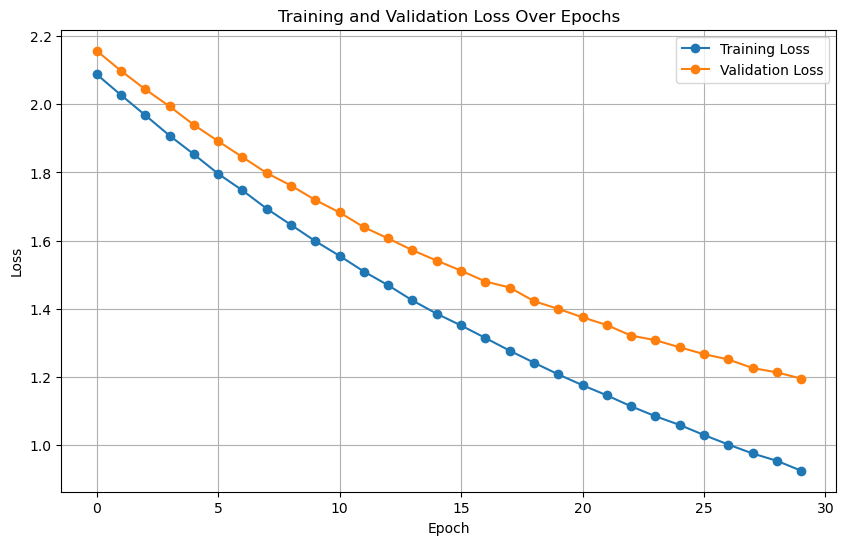

In [ ]:
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', marker='o')
plt.plot(val_losses, label='Validation Loss', marker='o')

# Add labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
from torchtext.data.metrics import bleu_score

def evaluate_bleu(model, val_loader, vocab_tgt, device):
    model.eval()
    translations = []
    references = []

    with torch.no_grad():
        for src, tgt in val_loader:
            src = src.to(device)
            tgt = tgt.to(device)

            # Generate predictions (greedy decoding)
            output = model(src, tgt[:, :-1], src_mask=None, tgt_mask=None)
            output = output.argmax(dim=-1)  # Greedy decoding

            # Convert predictions and references to text
            for i in range(output.size(0)):
                pred = output[i].tolist()
                ref = tgt[i, 1:].tolist()

                # Remove padding tokens
                pred = [token for token in pred if token != vocab_tgt['<pad>']]
                ref = [token for token in ref if token != vocab_tgt['<pad>']]

                # Convert tokens to strings
                pred_str = ' '.join([vocab_tgt.get_itos()[token] for token in pred])
                ref_str = ' '.join([vocab_tgt.get_itos()[token] for token in ref])

                translations.append(pred_str.split())
                references.append([ref_str.split()])  # Note: BLEU expects a list of references

    # Compute BLEU score
    bleu = bleu_score(translations, references)
    return bleu

# Compute BLEU score on the validation set
bleu_score = evaluate_bleu(model, val_loader, vocab_tgt, device)
print(f"BLEU Score: {bleu_score:.4f}")

BLEU Score: 0.3825
